In [1]:

import numpy as np
import matplotlib.pyplot as plt
import h5py

import PSID
from PSID.evaluation import evalPrediction
# from PSID.MatHelper import loadmat

In [2]:
data = h5py.File("../../data/Chewie_CO_FF_2016-10-07_go/neural.h5", "r")
print(data.keys())
print(data["test_data"].shape)

<KeysViewHDF5 ['test_behavior', 'test_data', 'test_epoch', 'test_full_behavior', 'test_target_direction', 'test_trial', 'train_behavior', 'train_data', 'train_epoch', 'train_full_behavior', 'train_target_direction', 'train_trial', 'valid_behavior', 'valid_data', 'valid_epoch', 'valid_full_behavior', 'valid_target_direction', 'valid_trial']>
(116, 100, 207)


In [17]:
# PSID(neural, behaviour, latents dimensions,
# latent states to extract in the first stage,
# future and past horizon)

# run here with 40 dim, where there are some oscillations

model = PSID.PSID(
    [d for d in data["train_data"]], [d for d in data["train_behavior"]], 40, 20, 10
)

(array([-0.01358885,  0.13863276,  0.19029323,  0.22454267,  0.28660216,
         0.1697903 , -0.0656404 , -0.02285269]),
 0.11347239727988001)

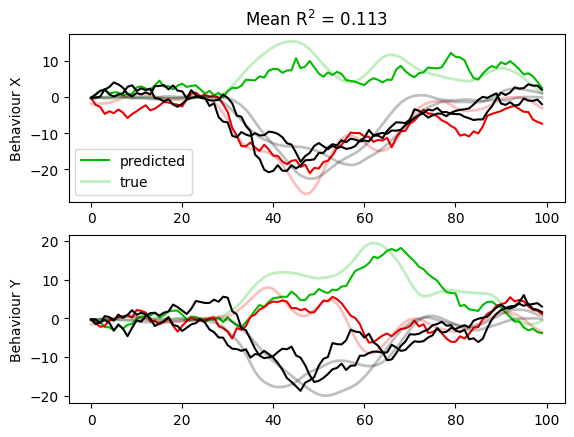

In [18]:
colors = plt.cm.nipy_spectral(np.arange(8)/8)

directions = data['test_target_direction']
unique_dirs = sorted(set(directions))
direction_index = [unique_dirs.index(i) for i in directions]

predictions = []
for trial in range(data['test_data'].shape[0]):
    predictions.append(model.predict(data['test_data'][trial])[0])
predictions = np.array(predictions)

R2 = np.empty((len(unique_dirs))) # directions
for i,d in enumerate(unique_dirs):
  precision_error = (predictions[directions==d] - data['test_behavior'][directions==d])**2
  total_variance = (predictions[directions==d] - data['test_behavior'][directions==d].mean(0))**2+1e-6
  R2[i] = 1 - precision_error.sum()/total_variance.sum() # sum over trials and time and space

for trial in range(4,8):
    b = data['test_behavior'][trial]
    p = predictions[trial]
    plt.subplot(2,1,1)
    plt.plot(p[:,0],'-', c=colors[direction_index[trial]], label='predicted')
    plt.plot(b[:,0], '-', c=colors[direction_index[trial]], alpha= 0.25, lw=2, label='true')
    plt.subplot(2,1,2)
    plt.plot(p[:,1],'-', c=colors[direction_index[trial]])
    plt.plot(b[:,1], '-', c=colors[direction_index[trial]], alpha= 0.25, lw=2) 
plt.subplot(2,1,1)
plt.ylabel('Behaviour X')
plt.title(f'Mean R$^2$ = {R2.mean():.3f}')
plt.legend(['predicted', 'true'])
plt.subplot(2,1,2)
plt.ylabel('Behaviour Y')
    
R2, R2.mean()

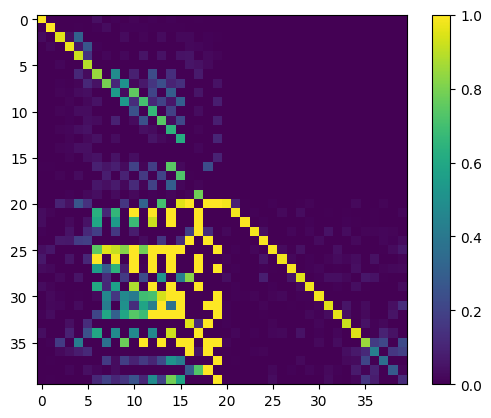

In [19]:
plt.imshow(model.A, vmin=0, vmax=1)
plt.colorbar()

(-1.1001240248513535, 1.1026045218784242, -1.1, 1.1)

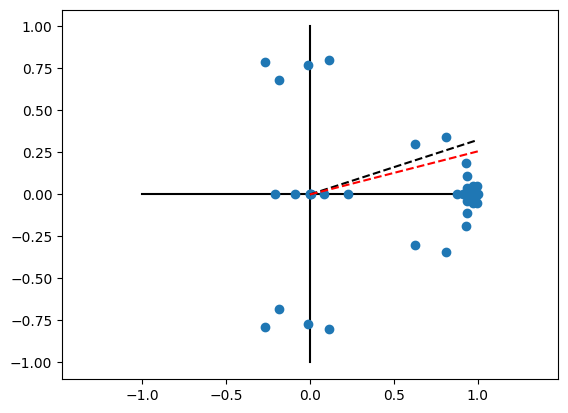

In [20]:
evals = np.linalg.eig(model.A)[0]

plt.plot([-1,1],[0,0],'k')
plt.plot([0,0],[-1,1],'k')
plt.plot(evals.real,evals.imag,'o')
# for ev in evals:
#     plt.plot([0,ev.real],[0,ev.imag],'o')
# draw a line at 18 degrees
plt.plot([0,1],[0,np.tan(np.pi/10)],'k--')
plt.plot([0,1],[0,np.tan(np.pi/12.5)],'r--')
plt.axis('equal')

In [16]:
evals

array([9.99024299e-01, 9.37370810e-01, 9.58262204e-01, 1.04942298e-17,
       7.64422342e-17])